<a href="https://colab.research.google.com/github/xian-cong/Final-Year-Project-Nottingham/blob/main/ECG_Emotion_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Emotion Recognition Classification
Using 16-bit ECG pre-processed data, TensorFlow RNN is used to make predictions.
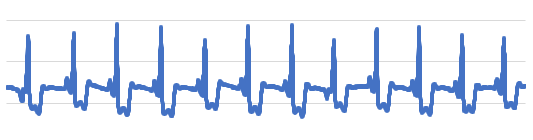

Prediction classes:
- 1 - baseline
- 2 - stress
- 3 - amusement
- 4 - meditation

In [ ]:
# work with data
import numpy as np
import pandas as pd

# get train and test sets
from sklearn.model_selection import train_test_split

import tensorflow as tf

In [ ]:
# create dataframe and import pre-processed dataset
dfs = [pd.read_csv('/content/drive/MyDrive/final_output.csv')]

In [ ]:
dfs

[        data1    data2    data3    data4    data5    data6    data7    data8  \
 0     33444.0  33503.0  33489.0  33463.0  33431.0  33431.0  33481.0  33414.0   
 1     34372.0  34295.0  34197.0  34159.0  34163.0  34261.0  34374.0  34481.0   
 2     32167.0  32172.0  32189.0  32197.0  32215.0  32172.0  32087.0  32031.0   
 3     36117.0  36161.0  36021.0  35783.0  35621.0  35547.0  35532.0  35399.0   
 4     33671.0  33679.0  33719.0  33756.0  33777.0  33767.0  33745.0  33708.0   
 ...       ...      ...      ...      ...      ...      ...      ...      ...   
 4141  32021.0  31987.0  31987.0  31975.0  32001.0  32025.0  32053.0  32068.0   
 4142  30696.0  30741.0  30801.0  30813.0  30799.0  30828.0  30879.0  30927.0   
 4143  32491.0  32379.0  32260.0  32123.0  32029.0  32019.0  32031.0  32055.0   
 4144  32501.0  32316.0  32141.0  31981.0  31796.0  31603.0  31426.0  31265.0   
 4145  36239.0  36049.0  35795.0  35580.0  35428.0  35263.0  35109.0  34957.0   
 
         data9   data10  .

In [ ]:
# rename each headings to integer number
for df in dfs:
  df.columns = list(range(len(df.columns)))

In [ ]:
dfs

[         0        1        2        3        4        5        6        7     \
 0     33444.0  33503.0  33489.0  33463.0  33431.0  33431.0  33481.0  33414.0   
 1     34372.0  34295.0  34197.0  34159.0  34163.0  34261.0  34374.0  34481.0   
 2     32167.0  32172.0  32189.0  32197.0  32215.0  32172.0  32087.0  32031.0   
 3     36117.0  36161.0  36021.0  35783.0  35621.0  35547.0  35532.0  35399.0   
 4     33671.0  33679.0  33719.0  33756.0  33777.0  33767.0  33745.0  33708.0   
 ...       ...      ...      ...      ...      ...      ...      ...      ...   
 4141  32021.0  31987.0  31987.0  31975.0  32001.0  32025.0  32053.0  32068.0   
 4142  30696.0  30741.0  30801.0  30813.0  30799.0  30828.0  30879.0  30927.0   
 4143  32491.0  32379.0  32260.0  32123.0  32029.0  32019.0  32031.0  32055.0   
 4144  32501.0  32316.0  32141.0  31981.0  31796.0  31603.0  31426.0  31265.0   
 4145  36239.0  36049.0  35795.0  35580.0  35428.0  35263.0  35109.0  34957.0   
 
          8        9     .

Row 0 - 6999 are data while Row 7000 is label

In [ ]:
dfs = pd.DataFrame(dfs[0])  # Assuming your data is stored in the first dimension

In [ ]:
# shuffle data and reset index to start from 0
data = dfs.sample(frac = 1.0, random_state = 1).reset_index(drop=True)
# rename col 7000 as Label
data = data.rename({7000: 'Label'}, axis=1)

In [ ]:
data

,0,1,2,3,4,5,6,7,8,9,...,6991,6992,6993,6994,6995,6996,6997,6998,6999,Label
0,31091.0,31103.0,31104.0,31132.0,31180.0,31194.0,31173.0,31151.0,31130.0,31171.0,...,30861.0,30807.0,30807.0,30820.0,30765.0,30793.0,30788.0,30787.0,30865.0,1.0
1,32692.0,32733.0,32901.0,33053.0,33079.0,33091.0,33135.0,33137.0,33112.0,33071.0,...,32839.0,32867.0,32979.0,33090.0,33092.0,33157.0,33233.0,33189.0,33247.0,3.0
2,35431.0,34977.0,34721.0,34495.0,34699.0,35300.0,35713.0,35839.0,35933.0,35943.0,...,34378.0,34287.0,34215.0,34195.0,34229.0,34271.0,34301.0,34364.0,34407.0,1.0
3,32661.0,32710.0,32667.0,32589.0,32589.0,32606.0,32467.0,32161.0,31919.0,31891.0,...,32500.0,32493.0,32499.0,32511.0,32541.0,32529.0,32463.0,32437.0,32433.0,1.0
4,32611.0,32565.0,32567.0,32647.0,32754.0,32836.0,32867.0,32925.0,33069.0,33343.0,...,29133.0,29193.0,29237.0,29311.0,29449.0,29501.0,29441.0,29353.0,29162.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4141,30844.0,30831.0,30631.0,30325.0,30088.0,29922.0,29847.0,29782.0,29617.0,29297.0,...,31254.0,31425.0,31507.0,31441.0,31423.0,31367.0,31309.0,31335.0,31407.0,3.0
4142,32287.0,32253.0,32225.0,32211.0,32157.0,32183.0,32259.0,32359.0,32415.0,32451.0,...,31784.0,31752.0,31723.0,31684.0,31684.0,31741.0,31811.0,31831.0,31825.0,1.0
4143,31631.0,31565.0,31563.0,31580.0,31641.0,31697.0,31729.0,31729.0,31686.0,31636.0,...,35279.0,35148.0,35069.0,35119.0,35265.0,35439.0,35557.0,35589.0,35571.0,1.0
4144,34434.0,34545.0,34721.0,34969.0,35188.0,35141.0,35051.0,35063.0,35117.0,35132.0,...,29727.0,29739.0,29754.0,29781.0,29911.0,29959.0,29954.0,29760.0,29620.0,2.0


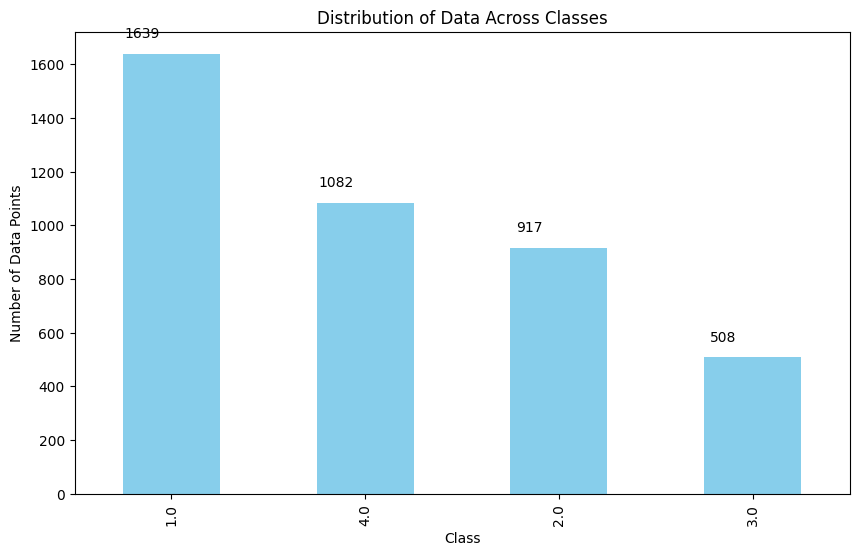

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Extracting the labels column
labels = data['Label']

# Counting the occurrences of each class
class_counts = labels.value_counts()

# Plotting the bar plot with count values on top
plt.figure(figsize=(10, 6))
bars = class_counts.plot(kind='bar', color='skyblue')

# Adding count values on top of each bar
for bar, count in zip(bars.patches, class_counts):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.15, bar.get_height() + 50, str(count), ha='center', va='bottom')

plt.title('Distribution of Data Across Classes')
plt.xlabel('Class')
plt.ylabel('Number of Data Points')
plt.show()


## Preprocessing

Can perform data scaling here.

In [ ]:
labels = data['Label']

# Specifying the target number of data points for each class (minimum class size)
target_size = min(labels.value_counts())

# Function to normalize each class
def normalize_class(class_label):
    class_data = data[data['Label'] == class_label]
    normalized_data = class_data.sample(target_size, replace=True, random_state=42)
    return normalized_data

# Applying the normalization function to each class
normalized_data = pd.concat([normalize_class(class_label) for class_label in labels.unique()])

# Shuffle the normalized data
normalized_data = normalized_data.sample(frac=1, random_state=42)

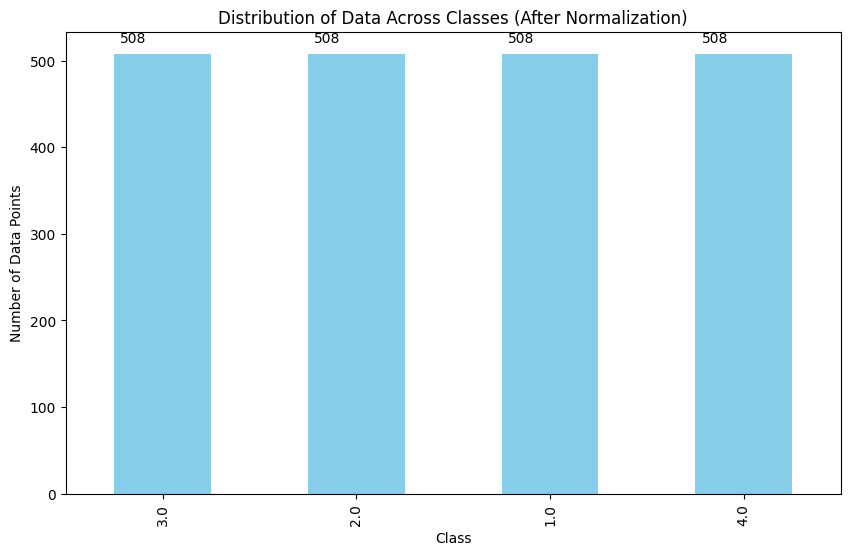

In [ ]:
normalized_labels = normalized_data['Label']

# Counting the occurrences of each class in the normalized data
normalized_class_counts = normalized_labels.value_counts()

# Plotting the bar plot with count values on top
plt.figure(figsize=(10, 6))
bars = normalized_class_counts.plot(kind='bar', color='skyblue')

# Adding count values on top of each bar
for bar, count in zip(bars.patches, normalized_class_counts):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.15, bar.get_height() + 10, str(count), ha='center', va='bottom')

plt.title('Distribution of Data Across Classes (After Normalization)')
plt.xlabel('Class')
plt.ylabel('Number of Data Points')
plt.show()

In [ ]:
# if want use normalised data for training, use this

# y = normalized_data['Label'].copy()
# X = normalized_data.drop('Label', axis = 1).copy()

In [ ]:
# if want use original data for training, use this

y = data['Label'].copy()
X = data.drop('Label', axis = 1).copy()

In [ ]:
# label column
y

0       1.0
1       3.0
2       1.0
3       1.0
4       3.0
       ... 
4141    3.0
4142    1.0
4143    1.0
4144    2.0
4145    3.0
Name: Label, Length: 4146, dtype: float64

In [ ]:
# one less column (left with raw data without label)
X

,0,1,2,3,4,5,6,7,8,9,...,6990,6991,6992,6993,6994,6995,6996,6997,6998,6999
0,31091.0,31103.0,31104.0,31132.0,31180.0,31194.0,31173.0,31151.0,31130.0,31171.0,...,30981.0,30861.0,30807.0,30807.0,30820.0,30765.0,30793.0,30788.0,30787.0,30865.0
1,32692.0,32733.0,32901.0,33053.0,33079.0,33091.0,33135.0,33137.0,33112.0,33071.0,...,32884.0,32839.0,32867.0,32979.0,33090.0,33092.0,33157.0,33233.0,33189.0,33247.0
2,35431.0,34977.0,34721.0,34495.0,34699.0,35300.0,35713.0,35839.0,35933.0,35943.0,...,34383.0,34378.0,34287.0,34215.0,34195.0,34229.0,34271.0,34301.0,34364.0,34407.0
3,32661.0,32710.0,32667.0,32589.0,32589.0,32606.0,32467.0,32161.0,31919.0,31891.0,...,32508.0,32500.0,32493.0,32499.0,32511.0,32541.0,32529.0,32463.0,32437.0,32433.0
4,32611.0,32565.0,32567.0,32647.0,32754.0,32836.0,32867.0,32925.0,33069.0,33343.0,...,29082.0,29133.0,29193.0,29237.0,29311.0,29449.0,29501.0,29441.0,29353.0,29162.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4141,30844.0,30831.0,30631.0,30325.0,30088.0,29922.0,29847.0,29782.0,29617.0,29297.0,...,31173.0,31254.0,31425.0,31507.0,31441.0,31423.0,31367.0,31309.0,31335.0,31407.0
4142,32287.0,32253.0,32225.0,32211.0,32157.0,32183.0,32259.0,32359.0,32415.0,32451.0,...,31762.0,31784.0,31752.0,31723.0,31684.0,31684.0,31741.0,31811.0,31831.0,31825.0
4143,31631.0,31565.0,31563.0,31580.0,31641.0,31697.0,31729.0,31729.0,31686.0,31636.0,...,35412.0,35279.0,35148.0,35069.0,35119.0,35265.0,35439.0,35557.0,35589.0,35571.0
4144,34434.0,34545.0,34721.0,34969.0,35188.0,35141.0,35051.0,35063.0,35117.0,35132.0,...,29702.0,29727.0,29739.0,29754.0,29781.0,29911.0,29959.0,29954.0,29760.0,29620.0


### Split into train and test sets

In [ ]:
# train set = 70%, test set = 30%
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=1)

In [ ]:
# 70% of original 4146 rows
X_train

,0,1,2,3,4,5,6,7,8,9,...,6990,6991,6992,6993,6994,6995,6996,6997,6998,6999
1145,32648.0,32593.0,32575.0,32591.0,32581.0,32537.0,32473.0,32485.0,32509.0,32532.0,...,29381.0,29378.0,29445.0,29530.0,29564.0,29599.0,29657.0,29687.0,29717.0,29755.0
1100,35463.0,35839.0,36217.0,36507.0,36713.0,36679.0,36705.0,36694.0,36455.0,36340.0,...,26199.0,26165.0,26058.0,26113.0,26199.0,26312.0,26304.0,26069.0,26034.0,26085.0
3479,34828.0,34644.0,34478.0,34416.0,34316.0,34105.0,33941.0,33861.0,33777.0,33581.0,...,28026.0,28015.0,28196.0,28420.0,28389.0,28249.0,28133.0,28083.0,28065.0,28122.0
917,29353.0,29261.0,29364.0,29462.0,29510.0,29559.0,29757.0,29787.0,29903.0,29985.0,...,32924.0,33031.0,33193.0,33417.0,33585.0,33631.0,33545.0,33479.0,33479.0,33529.0
1805,32701.0,32742.0,32805.0,32869.0,32931.0,32989.0,33037.0,33009.0,33087.0,33197.0,...,31348.0,31334.0,31340.0,31330.0,31326.0,31335.0,31325.0,31305.0,31311.0,31325.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2895,32456.0,32479.0,32504.0,32505.0,32457.0,32390.0,32351.0,32324.0,32247.0,32165.0,...,32564.0,32687.0,32725.0,32725.0,32749.0,32741.0,32715.0,32701.0,32673.0,32689.0
2763,32703.0,32861.0,33045.0,33089.0,33015.0,32982.0,32937.0,32900.0,32833.0,32714.0,...,33157.0,33116.0,32903.0,32700.0,32555.0,32451.0,32383.0,32405.0,32567.0,32773.0
905,19259.0,17171.0,15669.0,14904.0,14834.0,15344.0,16101.0,16967.0,17865.0,18866.0,...,20469.0,21414.0,22134.0,22651.0,22982.0,23382.0,23880.0,24387.0,24917.0,25505.0
3980,22466.0,22580.0,22799.0,23101.0,23545.0,24268.0,25143.0,25887.0,26501.0,27063.0,...,33199.0,32863.0,32598.0,32523.0,32471.0,32135.0,32087.0,31973.0,31755.0,31717.0


In [ ]:
# 70% of labels
y_train

1145    4.0
1100    2.0
3479    2.0
917     2.0
1805    4.0
       ... 
2895    1.0
2763    4.0
905     4.0
3980    3.0
235     4.0
Name: Label, Length: 2902, dtype: float64

## Training

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout, LeakyReLU
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.regularizers import l2

model = Sequential()

y_train_adjusted = y_train - 1

# Convert adjusted labels to one-hot encoded format
y_train_one_hot = to_categorical(y_train_adjusted, num_classes=4)

# Input layer
model.add(Dense(256, input_shape=(X_train.shape[1],)))

# FC Layer - 128 nodes
model.add(Dense(128))

# Batch Normalisation - 128 nodes
model.add(BatchNormalization())

# Dropout 0.5 - 128 nodes
model.add(Dropout(0.5))

# Leaky RELU 0.2 - 128 nodes
model.add(LeakyReLU(0.2))

# model.add(Dense(128, kernel_regularizer=l2(0.01)))

# FC Layer - 64 nodes
model.add(Dense(64))

# Batch Normalisation - 64 nodes
model.add(BatchNormalization())

# Dropout 0.5 - 64 nodes
model.add(Dropout(0.5))

# Leaky RELU 0.2 - 64 nodes
model.add(LeakyReLU(0.2))

# FC Layer - 16 nodes
model.add(Dense(32))

# Batch Normalisation - 16 nodes
model.add(BatchNormalization())

# Dropout 0.5 - 16 nodes
model.add(Dropout(0.5))

# Leaky RELU 0.2 - 16 nodes
model.add(LeakyReLU(0.2))

# FC Layer - 16 nodes
model.add(Dense(16))

# Batch Normalisation - 16 nodes
model.add(BatchNormalization())

# Dropout 0.5 - 16 nodes
model.add(Dropout(0.5))

# Leaky RELU 0.2 - 16 nodes
model.add(LeakyReLU(0.2))

# FC layer + sigmoid, output - 4 classes
model.add(Dense(4, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()

# Train the model
history = model.fit(
    X_train,
    y_train_one_hot,
    epochs=200,
    batch_size=32,
    validation_split=0.2
)


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 256)               1792256   
                                                                 
 dense_8 (Dense)             (None, 128)               32896     
                                                                 
 batch_normalization_5 (Bat  (None, 128)               512       
 chNormalization)                                                
                                                                 
 dropout_5 (Dropout)         (None, 128)               0         
                                                                 
 leaky_re_lu_5 (LeakyReLU)   (None, 128)               0         
                                                                 
 dense_9 (Dense)             (None, 64)                8256      
                                                      

In [ ]:
# import tensorflow as tf
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense
# from tensorflow.keras.utils import to_categorical

# # Assuming y_train contains class labels starting from 1
# # Subtract 1 to bring them into the range [0, num_classes-1]
# y_train_adjusted = y_train - 1

# # Convert adjusted labels to one-hot encoded format
# y_train_one_hot = to_categorical(y_train_adjusted, num_classes=4)

# model = Sequential()

# # Input layer
# model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))

# # Hidden layers
# model.add(Dense(64, activation='relu'))
# model.add(Dense(32, activation='relu'))

# # Output layer with 4 classes and softmax activation for multi-class classification
# model.add(Dense(4, activation='softmax'))

# # Compile the model
# model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# # Print the model summary
# model.summary()

# # Train the model
# history = model.fit(
#     X_train,
#     y_train_one_hot,
#     epochs=100,
#     batch_size=32,
#     validation_split=0.2
# )

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                448064    
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 4)                 132       
                                                                 
Total params: 454436 (1.73 MB)
Trainable params: 454436 (1.73 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/100
73/73 [==============================] - 2s 15ms/step - loss: 35071.6875 - accuracy: 0.2779 - val_loss: 2562.0054 - val_accuracy: 0.3580
Epo

## RNN Training

In [ ]:
# # for GRU in RNN
# tf.expand_dims(X_train, axis=2).shape

TensorShape([2902, 7000, 1])

In [ ]:
# ## RNN (evaluate as a time series)
# # inputs = tf.keras.Input(shape=(X_train.shape[1],))

# # expand = tf.expand_dims(inputs, axis=2)
# # gru = tf.keras.layers.GRU(256, return_sequences=True)(expand)
# # flatten = tf.keras.layers.Flatten()(gru)

# # outputs = tf.keras.layers.Dense(4, activation='softmax')(flatten)

# # model = tf.keras.Model(inputs=inputs, outputs=outputs)

# # print(model.summary())

# import tensorflow as tf
# from tensorflow.keras.models import Model
# from tensorflow.keras.layers import Input, GRU, Dense, Flatten, BatchNormalization, Dropout, LeakyReLU

# inputs = Input(shape=(X_train.shape[1],))

# # Expand dimensions for GRU input
# expand = tf.expand_dims(inputs, axis=2)

# # GRU layers
# gru1 = GRU(256, return_sequences=True)(expand)
# gru2 = GRU(128, return_sequences=True)(gru1)

# # Flatten the output
# flatten = Flatten()(gru2)

# # Dense layers
# dense1 = Dense(128)(flatten)
# batch_norm1 = BatchNormalization()(dense1)
# dropout1 = Dropout(0.5)(batch_norm1)
# leaky_relu1 = LeakyReLU(0.2)(dropout1)

# dense2 = Dense(64)(leaky_relu1)
# batch_norm2 = BatchNormalization()(dense2)
# dropout2 = Dropout(0.5)(batch_norm2)
# leaky_relu2 = LeakyReLU(0.2)(dropout2)

# dense3 = Dense(16)(leaky_relu2)
# batch_norm3 = BatchNormalization()(dense3)
# dropout3 = Dropout(0.5)(batch_norm3)
# leaky_relu3 = LeakyReLU(0.2)(dropout3)

# # Output layer with softmax activation
# outputs = Dense(4, activation='softmax')(leaky_relu3)

# # Create the model
# model = Model(inputs=inputs, outputs=outputs)

# # Print the model summary
# model.summary()


Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 7000)]            0         
                                                                 
 tf.expand_dims_2 (TFOpLamb  (None, 7000, 1)           0         
 da)                                                             
                                                                 
 gru_2 (GRU)                 (None, 7000, 256)         198912    
                                                                 
 gru_3 (GRU)                 (None, 7000, 128)         148224    
                                                                 
 flatten_2 (Flatten)         (None, 896000)            0         
                                                                 
 dense_29 (Dense)            (None, 128)               114688128 
                                                           

In [ ]:
# from tensorflow.keras.utils import to_categorical

# y_train_adjusted = y_train - 1

# # Convert adjusted labels to one-hot encoded format
# y_train_one_hot = to_categorical(y_train_adjusted, num_classes=4)

# model.compile(
#     optimizer='adam',
#     loss='binary_crossentropy',
#     metrics=['accuracy']
# )

# history = model.fit(
#     X_train,
#     y_train_one_hot,
#     epochs=100,
#     batch_size=32,
#     validation_split=0.2
# )

Epoch 1/100
73/73 [==============================] - 48s 579ms/step - loss: 0.7487 - accuracy: 0.2576 - val_loss: 460.9283 - val_accuracy: 0.3666
Epoch 2/100
73/73 [==============================] - 41s 561ms/step - loss: 0.6864 - accuracy: 0.2663 - val_loss: 1731.6613 - val_accuracy: 0.2048
Epoch 3/100
73/73 [==============================] - 42s 582ms/step - loss: 0.6401 - accuracy: 0.2921 - val_loss: 2689.4170 - val_accuracy: 0.2048
Epoch 4/100
73/73 [==============================] - 42s 581ms/step - loss: 0.6181 - accuracy: 0.3012 - val_loss: 3069.4219 - val_accuracy: 0.2048
Epoch 5/100
73/73 [==============================] - 43s 585ms/step - loss: 0.5945 - accuracy: 0.3279 - val_loss: 468.3293 - val_accuracy: 0.3666
Epoch 6/100
73/73 [==============================] - 42s 580ms/step - loss: 0.5932 - accuracy: 0.3274 - val_loss: 760.6590 - val_accuracy: 0.3666
Epoch 7/100
73/73 [==============================] - 42s 582ms/step - loss: 0.5757 - accuracy: 0.3498 - val_loss: 441.777

KeyboardInterrupt: 

## Result Graph


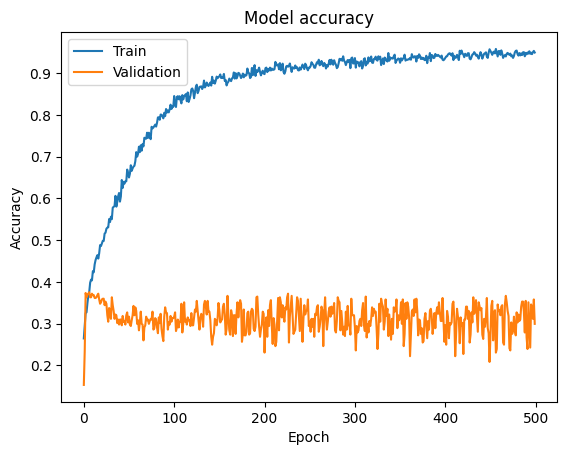

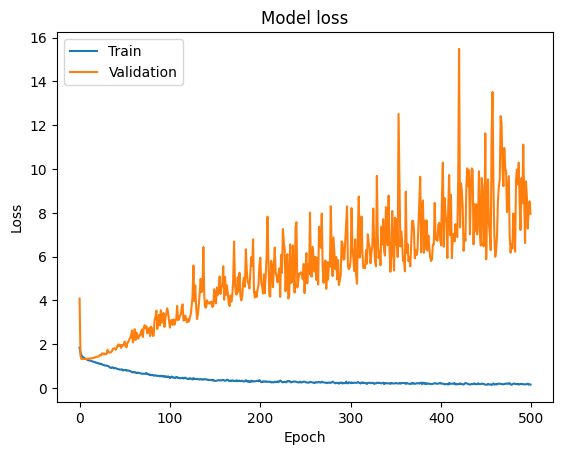

In [ ]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

## Prediction

In [ ]:
test_dfs = [pd.read_csv('/content/drive/MyDrive/output_S17(use for test).csv')]

In [ ]:
for test_df in test_dfs:
  test_df.columns = list(range(len(test_df.columns)))

In [ ]:
test_dfs = pd.DataFrame(test_dfs[0])  # Assuming your data is stored in the first dimension

In [ ]:
test_data = test_dfs.sample(frac = 1.0, random_state = 1).reset_index(drop=True)
test_data = test_data.rename({5000: 'Label'}, axis=1)

In [ ]:
test_data

,0,1,2,3,4,5,6,7,8,9,...,6991,6992,6993,6994,6995,6996,6997,6998,6999,Label
0,31773.0,31757.0,31732.0,31700.0,31734.0,31813.0,31853.0,31873.0,31858.0,31841.0,...,31577.0,31452.0,31568.0,31748.0,31869.0,31909.0,31881.0,31963.0,32005.0,3.0
1,37245.0,37193.0,37111.0,37223.0,37500.0,37732.0,37827.0,37958.0,38098.0,38313.0,...,24801.0,23061.0,22173.0,22009.0,22184.0,22611.0,23235.0,23813.0,24237.0,2.0
2,35245.0,35260.0,35077.0,34727.0,34495.0,34445.0,34676.0,34801.0,34595.0,34236.0,...,31694.0,31711.0,31733.0,31754.0,31798.0,31821.0,31837.0,31869.0,31835.0,1.0
3,28355.0,28467.0,28579.0,28525.0,28514.0,28606.0,28597.0,28717.0,28855.0,28957.0,...,32285.0,32417.0,32575.0,32687.0,32801.0,32807.0,32789.0,32910.0,33013.0,4.0
4,31431.0,31743.0,32033.0,32321.0,32513.0,32659.0,32916.0,33094.0,33369.0,33583.0,...,25132.0,25223.0,25376.0,25547.0,25716.0,25785.0,25867.0,25930.0,25981.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,24190.0,22913.0,22477.0,22529.0,22662.0,22909.0,23435.0,24348.0,25400.0,26100.0,...,27553.0,27519.0,27637.0,27744.0,27817.0,27911.0,27961.0,28004.0,27981.0,2.0
293,35516.0,35573.0,35528.0,35405.0,35258.0,35324.0,35505.0,35711.0,35869.0,35923.0,...,26867.0,26775.0,26743.0,26795.0,26857.0,26855.0,26834.0,26863.0,26848.0,2.0
294,32892.0,32939.0,32976.0,33012.0,33004.0,33001.0,33013.0,32987.0,32973.0,32990.0,...,31812.0,31671.0,31416.0,31119.0,30717.0,30267.0,29731.0,29230.0,28879.0,1.0
295,27983.0,27951.0,27917.0,27895.0,27915.0,27940.0,28001.0,28034.0,28012.0,28037.0,...,28983.0,28900.0,28964.0,28993.0,29093.0,29207.0,29287.0,29305.0,29380.0,2.0


In [ ]:
test_y = test_data['Label'].copy()
test_X = test_data.drop('Label', axis = 1).copy()

In [ ]:
test_y

0      3.0
1      2.0
2      1.0
3      4.0
4      2.0
      ... 
292    2.0
293    2.0
294    1.0
295    2.0
296    1.0
Name: Label, Length: 297, dtype: float64

In [ ]:
test_X

,0,1,2,3,4,5,6,7,8,9,...,6990,6991,6992,6993,6994,6995,6996,6997,6998,6999
0,31773.0,31757.0,31732.0,31700.0,31734.0,31813.0,31853.0,31873.0,31858.0,31841.0,...,31679.0,31577.0,31452.0,31568.0,31748.0,31869.0,31909.0,31881.0,31963.0,32005.0
1,37245.0,37193.0,37111.0,37223.0,37500.0,37732.0,37827.0,37958.0,38098.0,38313.0,...,27736.0,24801.0,23061.0,22173.0,22009.0,22184.0,22611.0,23235.0,23813.0,24237.0
2,35245.0,35260.0,35077.0,34727.0,34495.0,34445.0,34676.0,34801.0,34595.0,34236.0,...,31655.0,31694.0,31711.0,31733.0,31754.0,31798.0,31821.0,31837.0,31869.0,31835.0
3,28355.0,28467.0,28579.0,28525.0,28514.0,28606.0,28597.0,28717.0,28855.0,28957.0,...,32249.0,32285.0,32417.0,32575.0,32687.0,32801.0,32807.0,32789.0,32910.0,33013.0
4,31431.0,31743.0,32033.0,32321.0,32513.0,32659.0,32916.0,33094.0,33369.0,33583.0,...,25187.0,25132.0,25223.0,25376.0,25547.0,25716.0,25785.0,25867.0,25930.0,25981.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,24190.0,22913.0,22477.0,22529.0,22662.0,22909.0,23435.0,24348.0,25400.0,26100.0,...,27497.0,27553.0,27519.0,27637.0,27744.0,27817.0,27911.0,27961.0,28004.0,27981.0
293,35516.0,35573.0,35528.0,35405.0,35258.0,35324.0,35505.0,35711.0,35869.0,35923.0,...,26764.0,26867.0,26775.0,26743.0,26795.0,26857.0,26855.0,26834.0,26863.0,26848.0
294,32892.0,32939.0,32976.0,33012.0,33004.0,33001.0,33013.0,32987.0,32973.0,32990.0,...,31855.0,31812.0,31671.0,31416.0,31119.0,30717.0,30267.0,29731.0,29230.0,28879.0
295,27983.0,27951.0,27917.0,27895.0,27915.0,27940.0,28001.0,28034.0,28012.0,28037.0,...,28919.0,28983.0,28900.0,28964.0,28993.0,29093.0,29207.0,29287.0,29305.0,29380.0


In [ ]:
predictions = model.predict(test_X)

# Iterate through each row and print the predictions
for i in range(len(predictions)):
    print(f"Row {i+1} Predictions: {predictions[i]}")

10/10 [==============================] - 0s 5ms/step
Row 1 Predictions: [1. 1. 0. 0.]
Row 2 Predictions: [1. 1. 0. 0.]
Row 3 Predictions: [1. 1. 0. 0.]
Row 4 Predictions: [1. 1. 0. 0.]
Row 5 Predictions: [1. 1. 0. 0.]
Row 6 Predictions: [1. 1. 0. 0.]
Row 7 Predictions: [1. 1. 0. 0.]
Row 8 Predictions: [1. 1. 0. 0.]
Row 9 Predictions: [1. 1. 0. 0.]
Row 10 Predictions: [1. 1. 0. 0.]
Row 11 Predictions: [1. 1. 0. 0.]
Row 12 Predictions: [1. 1. 0. 0.]
Row 13 Predictions: [1. 1. 0. 0.]
Row 14 Predictions: [1. 1. 0. 0.]
Row 15 Predictions: [1. 1. 0. 0.]
Row 16 Predictions: [1. 1. 0. 0.]
Row 17 Predictions: [1. 1. 0. 0.]
Row 18 Predictions: [1. 1. 0. 0.]
Row 19 Predictions: [1. 1. 0. 0.]
Row 20 Predictions: [1. 1. 0. 0.]
Row 21 Predictions: [1. 1. 0. 0.]
Row 22 Predictions: [1. 1. 0. 0.]
Row 23 Predictions: [1. 1. 0. 0.]
Row 24 Predictions: [1. 1. 0. 0.]
Row 25 Predictions: [1. 1. 0. 0.]
Row 26 Predictions: [1. 1. 0. 0.]
Row 27 Predictions: [1. 1. 0. 0.]
Row 28 Predictions: [1. 1. 0. 0.]
Row 

## Resuts

In [ ]:
from tensorflow.keras.utils import to_categorical

# Adjust labels to be 0 or 1
y_test_adjusted = y_test - 1

# Convert adjusted labels to one-hot encoded format
y_test_one_hot = to_categorical(y_test_adjusted, num_classes=4)

results = model.evaluate(X_test, y_test_one_hot, verbose=0)

In [ ]:
print("Test Accuracy: {:.2f}%".format(results[1]*100))

Test Accuracy: 32.64%


34.89%

## Save model

In [ ]:
model.save('/content/drive/MyDrive/ecg_emotion_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
# convert to TFLITE
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.OPTIMIZE_FOR_SIZE]
tflite_model = converter.convert()

open('/content/drive/MyDrive/ecg_emotion_model.tflite', 'wb').write(tflite_model)

1842816

In [ ]:
# Function: Convert some hex value into an array for C programming
def hex_to_c_array(hex_data, var_name):
  c_str = ''
  c_str += '#ifndef' + var_name.upper() + '_H\n'
  c_str += '#define' + var_name.upper() + '_H\n\n'

  c_str += '\nconst unsigned int ' + var_name + '_len = ' + str(len(hex_data)) + ';\n'

  c_str += 'const unsigned char ' + var_name + '[] = {'

  hex_array = []

  for i, val in enumerate(hex_data) :
    hex_str = format(val,'#04x')
    if(i+1) < len(hex_data):
      hex_str += ','
    if(i+1) %12 == 0:
      hex_str += '\n'
    hex_array.append(hex_str)

  c_str += '\n' + format(' '.join(hex_array)) + '\n};\n\n'

  c_str += '#endif //' + var_name.upper() + '_H'

  return c_str

In [ ]:
c_model_name = '/content/drive/MyDrive/ecg_emotion_model'

In [ ]:
with open(c_model_name + '.h','w') as file:
  file.write(hex_to_c_array(tflite_model, c_model_name))

# 2 Class Classification

In [ ]:
# work with data
import numpy as np
import pandas as pd

# get train and test sets
from sklearn.model_selection import train_test_split

import tensorflow as tf

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# create dataframe and import pre-processed dataset
dfs = [pd.read_csv('/content/drive/MyDrive/final_output_2class_5000in.csv')]

In [ ]:
dfs

[      data1  data2  data3  data4  data5  data6  data7  data8  data9  data10  \
 0     33444  33503  33489  33463  33431  33431  33481  33414  33339   33372   
 1     30651  30855  31110  31253  31205  31079  30994  30827  30537   30137   
 2     33727  33637  33561  33609  33577  33497  33455  33398  33402   33505   
 3     38853  39021  39228  39700  40401  41167  42274  44249  46271   46293   
 4     35804  34961  34179  33341  32311  31625  31319  31033  30605   30083   
 ...     ...    ...    ...    ...    ...    ...    ...    ...    ...     ...   
 3835  30380  30388  30410  30394  30473  30513  30548  30581  30629   30706   
 3836  31914  31873  31895  32018  32244  32505  32801  33047  33084   33113   
 3837  37975  38305  38628  38875  39035  39201  39428  39715  40037   40292   
 3838  34581  34575  34531  34431  34373  34319  34273  34279  34253   34214   
 3839  39725  39559  39285  39167  39073  38889  38549  38216  37903   37556   
 
       ...  data4992  data4993  data49

In [ ]:
# rename each headings to integer number
for df in dfs:
  df.columns = list(range(len(df.columns)))

In [ ]:
dfs

[       0      1      2      3      4      5      6      7      8      9     \
 0     33444  33503  33489  33463  33431  33431  33481  33414  33339  33372   
 1     30651  30855  31110  31253  31205  31079  30994  30827  30537  30137   
 2     33727  33637  33561  33609  33577  33497  33455  33398  33402  33505   
 3     38853  39021  39228  39700  40401  41167  42274  44249  46271  46293   
 4     35804  34961  34179  33341  32311  31625  31319  31033  30605  30083   
 ...     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
 3835  30380  30388  30410  30394  30473  30513  30548  30581  30629  30706   
 3836  31914  31873  31895  32018  32244  32505  32801  33047  33084  33113   
 3837  37975  38305  38628  38875  39035  39201  39428  39715  40037  40292   
 3838  34581  34575  34531  34431  34373  34319  34273  34279  34253  34214   
 3839  39725  39559  39285  39167  39073  38889  38549  38216  37903  37556   
 
       ...   4991   4992   4993   4994   4995   49

In [ ]:
dfs = pd.DataFrame(dfs[0])  # Assuming your data is stored in the first dimension

In [ ]:
# shuffle data and reset index to start from 0
data = dfs.sample(frac = 1.0, random_state = 1).reset_index(drop=True)
# rename col 7000 as Label
data = data.rename({5000: 'Label'}, axis=1)

In [ ]:
data

,0,1,2,3,4,5,6,7,8,9,...,4991,4992,4993,4994,4995,4996,4997,4998,4999,Label
0,33620,33543,33492,33452,33411,33407,33394,33397,33388,33373,...,29451,29201,29031,28929,28897,28905,28885,28864,28853,1
1,32397,32251,32167,31975,31845,31772,31697,31574,31417,31363,...,27659,27809,27929,27892,27997,28135,28081,28075,28062,2
2,30436,30455,30413,30354,30301,30285,30367,30302,30324,30324,...,31435,31533,31534,31655,31971,32085,32156,32249,32359,2
3,31455,31475,31495,31493,31475,31535,31573,31579,31555,31521,...,31400,31441,31433,31396,31425,31525,31655,31846,31982,1
4,26218,26322,26417,26591,26689,26652,26691,26789,26885,26901,...,57773,61933,65015,65515,65517,65516,65519,65517,65519,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3835,32641,32394,32174,32059,32207,32301,32351,32301,32225,32091,...,30543,30488,30455,30500,30523,30471,30516,30509,30439,2
3836,33569,33611,33630,33521,33561,33593,33527,33477,33413,33392,...,32345,32373,32427,32428,32413,32425,32463,32523,32559,1
3837,34105,34045,34004,33916,33828,33775,33633,33425,33199,33002,...,31972,32021,32027,31964,31937,31992,32023,32030,32030,1
3838,33029,33069,33108,33137,33089,33082,33050,32985,32945,32957,...,30655,30844,30945,30915,30778,30727,30551,30353,30316,2


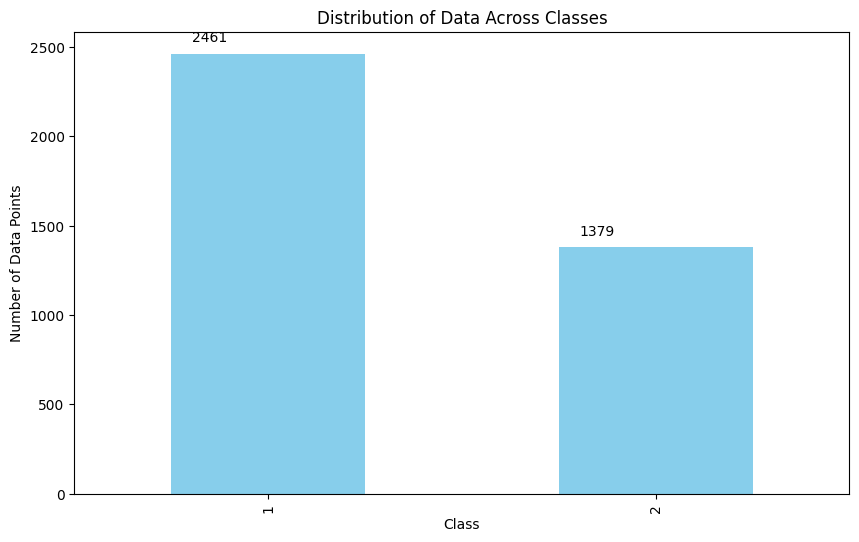

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Extracting the labels column
labels = data['Label']

# Counting the occurrences of each class
class_counts = labels.value_counts()

# Plotting the bar plot with count values on top
plt.figure(figsize=(10, 6))
bars = class_counts.plot(kind='bar', color='skyblue')

# Adding count values on top of each bar
for bar, count in zip(bars.patches, class_counts):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.15, bar.get_height() + 50, str(count), ha='center', va='bottom')

plt.title('Distribution of Data Across Classes')
plt.xlabel('Class')
plt.ylabel('Number of Data Points')
plt.show()


In [ ]:
labels = data['Label']

# Specifying the target number of data points for each class (minimum class size)
target_size = min(labels.value_counts())

# Function to normalize each class
def normalize_class(class_label):
    class_data = data[data['Label'] == class_label]
    normalized_data = class_data.sample(target_size, replace=True, random_state=42)
    return normalized_data

# Applying the normalization function to each class
normalized_data = pd.concat([normalize_class(class_label) for class_label in labels.unique()])

# Shuffle the normalized data
normalized_data = normalized_data.sample(frac=1, random_state=42)

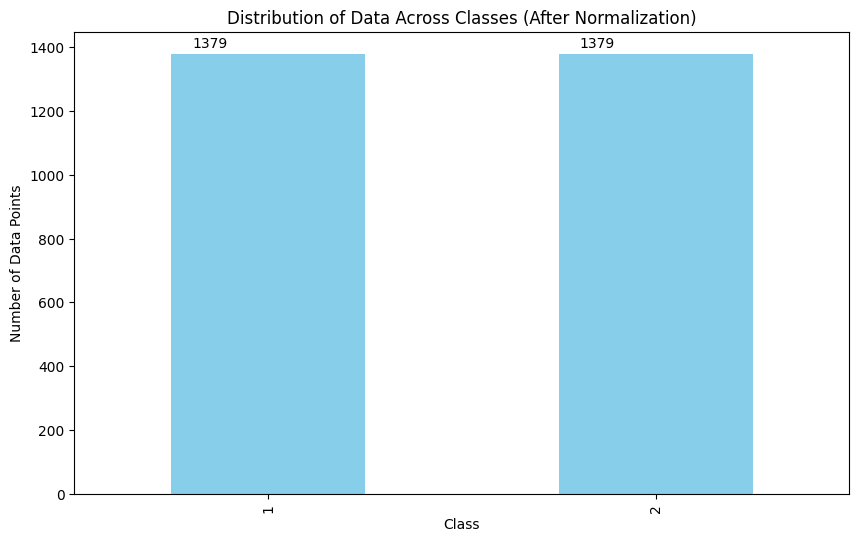

In [ ]:
normalized_labels = normalized_data['Label']

# Counting the occurrences of each class in the normalized data
normalized_class_counts = normalized_labels.value_counts()

# Plotting the bar plot with count values on top
plt.figure(figsize=(10, 6))
bars = normalized_class_counts.plot(kind='bar', color='skyblue')

# Adding count values on top of each bar
for bar, count in zip(bars.patches, normalized_class_counts):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.15, bar.get_height() + 10, str(count), ha='center', va='bottom')

plt.title('Distribution of Data Across Classes (After Normalization)')
plt.xlabel('Class')
plt.ylabel('Number of Data Points')
plt.show()

In [ ]:
# if want use normalised data for training, use this

y = normalized_data['Label'].copy()
X = normalized_data.drop('Label', axis = 1).copy()

In [ ]:
# label column
y

1686    1
88      1
3133    2
274     2
1878    1
       ..
1634    2
769     1
1041    1
1104    1
552     1
Name: Label, Length: 2758, dtype: int64

In [ ]:
# one less column (left with raw data without label)
X

,0,1,2,3,4,5,6,7,8,9,...,4990,4991,4992,4993,4994,4995,4996,4997,4998,4999
1686,32413,32341,32318,32378,32433,32510,32558,32537,32549,32631,...,32494,32468,32487,32562,32602,32605,32661,32597,32543,32567
88,34044,33979,33899,33885,33874,33868,33872,33833,33845,33877,...,32775,32739,32679,32649,32625,32544,32463,32433,32417,32367
3133,35157,35285,35341,35393,35366,35253,35135,35063,35020,35007,...,32865,32877,32895,33100,33253,33269,33049,32861,32837,32816
274,37129,36979,36853,36708,36547,36359,36098,35729,35457,35279,...,32397,32383,32337,32287,32244,32209,32213,32233,32223,32204
1878,31995,31867,31805,31736,31655,31603,31566,31519,31489,31458,...,41999,45500,48688,51031,52139,51482,48599,44771,40729,36589
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1634,34652,34521,34308,34035,33740,33515,33355,33241,33173,33137,...,32095,32323,32581,32751,32932,33084,33153,33217,33322,33471
769,32100,32189,32322,32483,32609,32727,32809,32885,32922,32999,...,35284,35179,35045,34925,34829,34757,34861,34925,34944,34959
1041,26056,24716,23684,22827,22403,22142,22151,22506,23397,24807,...,28615,28637,28670,28727,28805,28869,28868,28879,28901,28899
1104,32821,32741,32647,32613,32652,32681,32645,32703,32807,32834,...,33556,33527,33449,33413,33366,33291,33248,33271,33287,33307


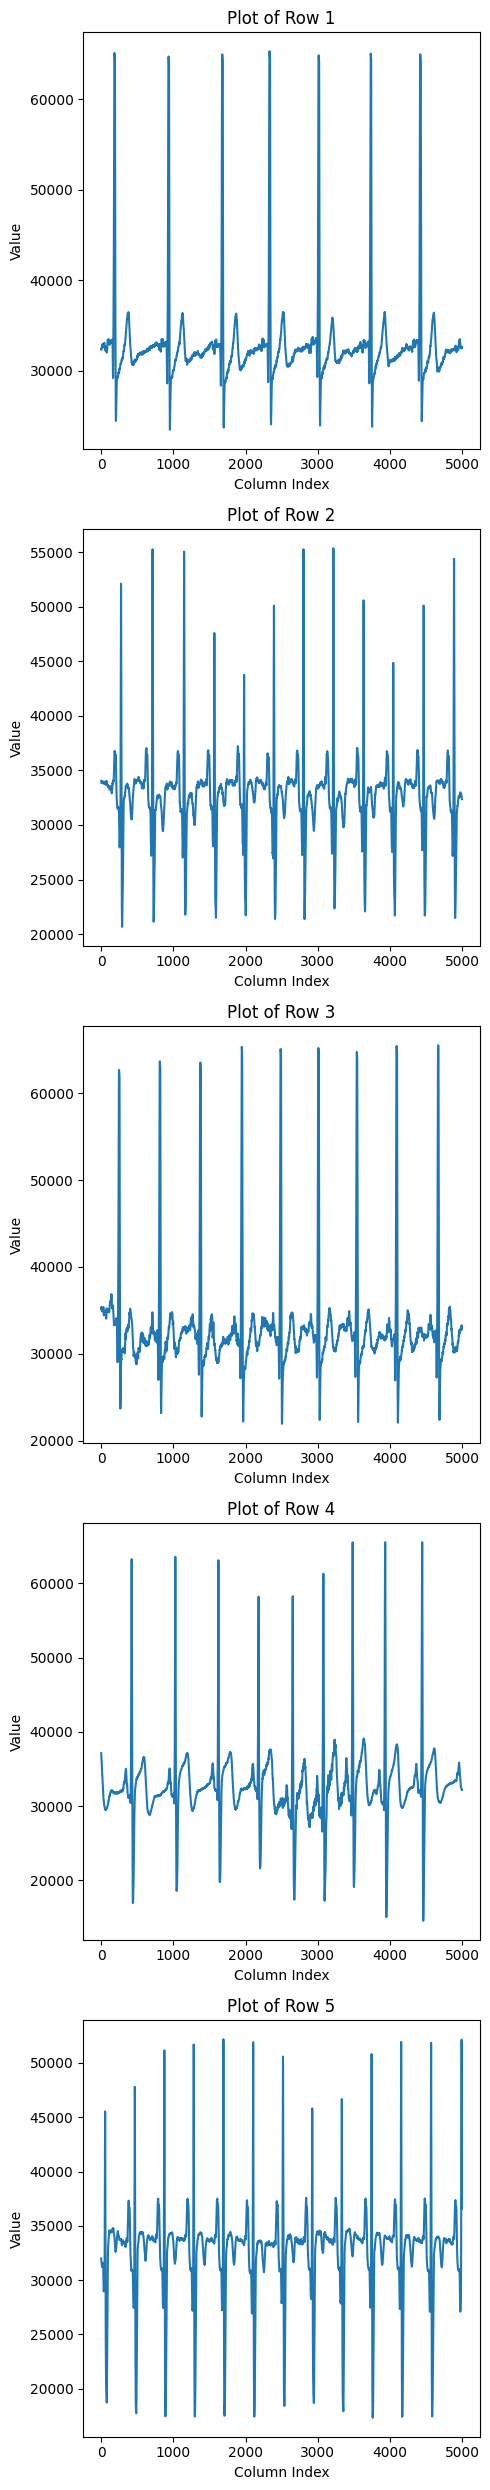

In [ ]:
# Assuming dfs is your DataFrame
# Extracting the first three rows
rows_to_plot = X.iloc[:5, :]

# Get the number of rows and columns
num_rows, num_cols = rows_to_plot.shape

# Create subplots
fig, axes = plt.subplots(num_rows, 1, figsize=(5, 5*num_rows))

# Plot each row in a separate subplot
for i in range(num_rows):
    axes[i].plot(rows_to_plot.iloc[i, :])
    axes[i].set_xlabel('Column Index')
    axes[i].set_ylabel('Value')
    axes[i].set_title(f'Plot of Row {i+1}')

# Adjust layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()

In [ ]:
# train set = 70%, test set = 30%
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.85, random_state=1)

In [ ]:
# 70% of original 4146 rows
X_train

,0,1,2,3,4,5,6,7,8,9,...,4990,4991,4992,4993,4994,4995,4996,4997,4998,4999
3619,28028,27977,27939,27945,27939,27912,27841,27781,27703,27639,...,33811,33692,33576,33479,33394,33333,33273,33275,33247,33173
2619,33431,33447,33430,33415,33447,33461,33485,33420,33393,33401,...,29894,29829,29615,29485,29551,29572,29605,29685,29671,29707
1244,38223,37825,37465,37121,36821,36453,36117,35809,35375,34988,...,26611,26697,26715,26631,26405,26285,26136,25992,25776,25578
717,30812,30882,31085,31172,31313,31556,31803,31924,32068,32154,...,25526,24343,23225,22713,22793,23455,24501,26033,27933,30195
2419,31139,31271,31327,31373,31436,31590,31868,32021,32020,31914,...,30782,31041,31140,31219,31285,31237,31091,31053,31135,31167
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3208,27798,27635,27535,27559,27603,27613,27711,27917,28073,28197,...,36317,36001,35671,35393,35089,34655,34133,33617,33063,32642
1259,35129,34951,34820,34683,34572,34384,34135,33887,33626,33419,...,32148,32145,32077,32095,32217,32375,32431,32430,32423,32545
435,34567,34593,34625,34629,34660,34757,34895,35009,35046,35114,...,33558,33742,33877,33919,34107,34287,34447,34592,34791,35109
1164,44157,49419,55028,60729,64314,65517,65517,65516,65519,65517,...,34026,34004,33980,34007,33974,33894,33985,34159,34342,34439


In [ ]:
# 70% of labels
y_train

3619    1
2619    2
1244    2
717     2
2419    2
       ..
3208    2
1259    2
435     2
1164    2
491     1
Name: Label, Length: 2344, dtype: int64

## ANN

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout, LeakyReLU
from tensorflow.keras.regularizers import l2
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint(filepath='model_weights_epoch_{epoch:02d}.h5', save_weights_only=True, save_best_only=False, verbose=1)

model = Sequential()

# Adjust labels to be 0 or 1
y_train_adjusted = y_train - 1

# Convert adjusted labels to one-hot encoded format
y_train_one_hot = to_categorical(y_train_adjusted, num_classes=2)

# Input layer
model.add(Dense(32, input_shape=(X_train.shape[1],)))

# FC Layer - 128 nodes
model.add(Dense(16))

# model.add(Dense(16, kernel_regularizer=l2(0.01)))  # Add L2 regularization

# Batch Normalisation - 128 nodes
model.add(BatchNormalization())

# Dropout 0.5 - 128 nodes
model.add(Dropout(0.2))

# Leaky RELU 0.2 - 128 nodes
model.add(LeakyReLU(0.2))

# model.add(Dense(128, kernel_regularizer=l2(0.01)))

# FC Layer - 64 nodes
model.add(Dense(8))

# Batch Normalisation - 64 nodes
model.add(BatchNormalization())

# Dropout 0.5 - 64 nodes
model.add(Dropout(0.2))

# Leaky RELU 0.2 - 64 nodes
model.add(LeakyReLU(0.2))

# FC Layer - 16 nodes
model.add(Dense(4))

# Batch Normalisation - 16 nodes
model.add(BatchNormalization())

# Dropout 0.5 - 16 nodes
model.add(Dropout(0.2))

# Leaky RELU 0.2 - 16 nodes
model.add(LeakyReLU(0.2))

# FC layer + sigmoid, output - 4 classes
model.add(Dense(2, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()

# Train the model
history = model.fit(
    X_train,
    y_train_one_hot,
    epochs=200,
    batch_size=32,
    validation_split=0.2,
    callbacks=[checkpoint]
)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                160032    
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 batch_normalization (Batch  (None, 16)                64        
 Normalization)                                                  
                                                                 
 dropout (Dropout)           (None, 16)                0         
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 16)                0         
                                                                 
 dense_2 (Dense)             (None, 8)                 136       
                                                        

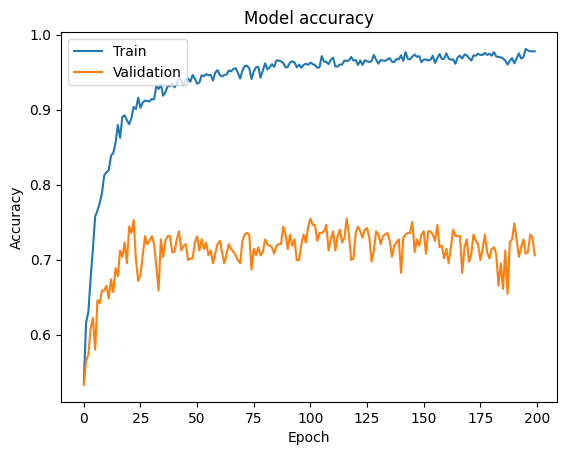

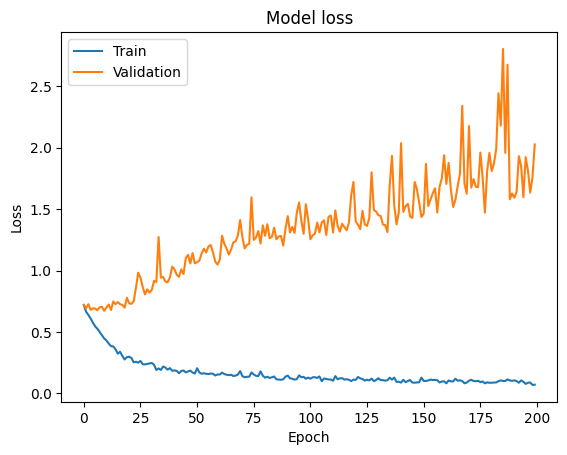

In [ ]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
import numpy as np
from tensorflow.keras.utils import to_categorical

# Find the epoch with the highest validation accuracy
best_epoch = np.argmax(history.history['val_accuracy'])
best_val_accuracy = history.history['val_accuracy'][best_epoch]

print("Best Validation Accuracy:", best_val_accuracy, "at epoch", best_epoch + 1)

# Evaluate the model at the best epoch
best_model = Sequential.from_config(model.get_config())  # Create a new model with the same architecture

# Load the weights of the model at the best epoch
best_model.load_weights(f"model_weights_epoch_{best_epoch + 1}.h5")

# Compile the best model
best_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Adjust labels to be 0 or 1
y_test_adjusted = y_test - 1

# Convert adjusted labels to one-hot encoded format
y_test_one_hot = to_categorical(y_test_adjusted, num_classes=2)

# Evaluate the best model on test data
test_loss, test_accuracy = best_model.evaluate(X_test, y_test_one_hot)
print("Test Accuracy of the Best Model:", test_accuracy)


Best Validation Accuracy: 0.7547974586486816 at epoch 101
13/13 [==============================] - 0s 5ms/step - loss: 1.3477 - accuracy: 0.7319
Test Accuracy of the Best Model: 0.7318840622901917


In [ ]:
# from tensorflow.keras.utils import to_categorical

# # Adjust labels to be 0 or 1
# y_test_adjusted = y_test - 1

# # Convert adjusted labels to one-hot encoded format
# y_test_one_hot = to_categorical(y_test_adjusted, num_classes=2)

# results = model.evaluate(X_test, y_test_one_hot, verbose=0)

In [ ]:
# print("Test Accuracy: {:.2f}%".format(results[1]*100))

Test Accuracy: 49.83%


ANN Test Accuracy: 70.25% 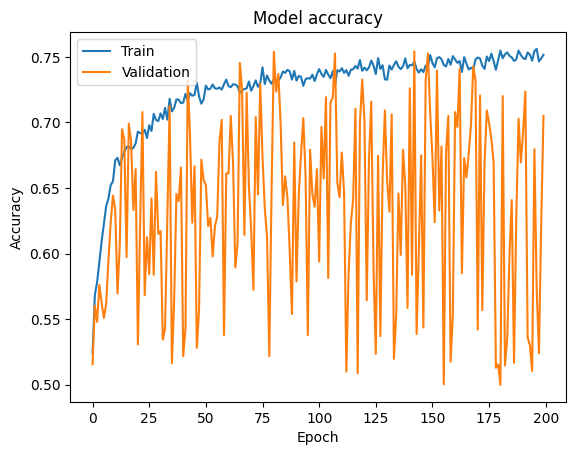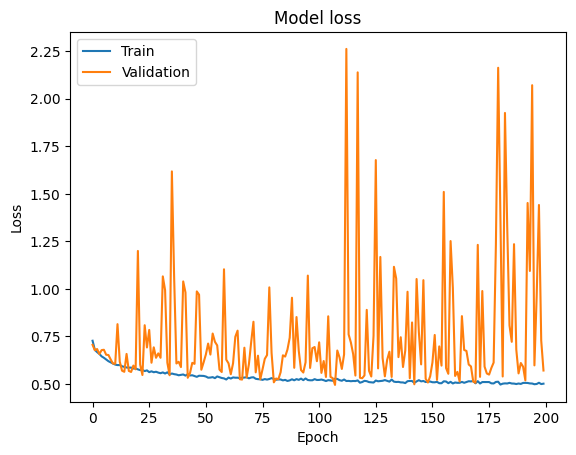\
RNN Test Accuracy: 50.36%

In [ ]:
best_model.save('/content/drive/MyDrive/ecg_emotion_model_2class_5000in.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
# convert to TFLITE
converter = tf.lite.TFLiteConverter.from_keras_model(best_model)
converter.optimizations = [tf.lite.Optimize.OPTIMIZE_FOR_SIZE]
tflite_model = converter.convert()

open('/content/drive/MyDrive/ecg_emotion_model_2class_5000in.tflite', 'wb').write(tflite_model)

166488

In [ ]:
# Function: Convert some hex value into an array for C programming
def hex_to_c_array(hex_data, var_name):
  c_str = ''
  c_str += '#ifndef' + var_name.upper() + '_H\n'
  c_str += '#define' + var_name.upper() + '_H\n\n'

  c_str += '\nconst unsigned int ' + var_name + '_len = ' + str(len(hex_data)) + ';\n'

  c_str += 'const unsigned char ' + var_name + '[] = {'

  hex_array = []

  for i, val in enumerate(hex_data) :
    hex_str = format(val,'#04x')
    if(i+1) < len(hex_data):
      hex_str += ','
    if(i+1) %12 == 0:
      hex_str += '\n'
    hex_array.append(hex_str)

  c_str += '\n' + format(' '.join(hex_array)) + '\n};\n\n'

  c_str += '#endif //' + var_name.upper() + '_H'

  return c_str

In [ ]:
c_model_name = '/content/drive/MyDrive/ecg_emotion_model_2class_5000in'

In [ ]:
with open(c_model_name + '.h','w') as file:
  file.write(hex_to_c_array(tflite_model, c_model_name))